

# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  This data set contains information about 10,000 movies collected from The Movie Database (TMDb).The Dataset has been the below columns:

             a)imdb_id:Unique identifier for each movie.
             b)Popularity:How popular a particular movie is
             c)Budget: Initial budget of the movie
             d)Revenue:Revenue of the movie.
             e)Original title: Original movie title
             f)Cast: The people who act in the movie.
             g)Homepage: URL to the movie webpage.
             h)Director: Creative lead in a movie.
             i)Tagline:main words that briefly describe the movie.
             j)overview: short description of the movie.
             k)Runtime: Movie duration in minutes.
             l)genres: The categories of art in the movie.
             m)Production Companies: Company that produced the movie.
             n)release_date: Date movie was released to the public.
             o)vote_count:number of votes for the movie on imdb
             p)vote_average: average movie rating on imdb out of 10.
             q)release_year: year when movie was released to the public.
             r)budget_adj:The budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.
             s)revenue_adj:The revenue of the associated movie in terms of 2010 dollars, accounting for inflation overtime


### Question(s) for Analysis

        a)What is the number of movies produced each year from 1960.
        b)Which genres combinations are most popular among directors.
        c)How many times has each specific genre been played in a movie since 2010
        d)What kinds of properties are associated with movies that have high revenues.
        e)How many times has each director directed movies with each of the different genres.
        f)How many times has each cast played a movie with any of the different genres
        g)Are there instances where directors cast their own Movies
        h)Is there a relationship between the average vote of a movie and its runtime
        i)Is there a relationship between the popularity of a movie and its vote count
        j)Is there a relationship between the popularity of a movie and its runtime
 

In [10]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.0f' % x)
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [11]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling






In [12]:
# Load the data into the movie_data DataFrame

movie_data=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')




### Data Assesment
### Quality issues
1) missing values  across different columns

2) we have duplicate value

3) inaccurate values in the runtime columns

4) release date should be datetime

5) id column data type should be object.

6) budget and revenue columns values set to 0




### Tideness Issues
1)Multiple data in the cast,director, production_companies, genre columns

In [13]:
movie_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
movie_data.duplicated().sum()

1

In [15]:
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866,10866,10866,10866,10866,10866,10866,10866,10866,10866
mean,66064,1,14625701,39823320,102,217,6,2001,17551040,51364363
std,92130,1,30913214,117003487,31,576,1,13,34306156,144632485
min,5,0,0,0,0,10,2,1960,0,0
25%,10596,0,0,0,90,17,5,1995,0,0
50%,20669,0,0,0,99,38,6,2006,0,0
75%,75610,1,15000000,24000000,111,146,7,2011,20853251,33697096
max,417859,33,425000000,2781505847,900,9767,9,2015,425000000,2827123750


In [16]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [17]:
movie_data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,33,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6,2015,137999939,1392445893
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7,2015,137999939,348161292
2,262500,tt2908446,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6,2015,101199955,271619025
3,140607,tt2488496,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,8,2015,183999919,1902723130
4,168259,tt2820852,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7,2015,174799923,1385748801
5,281957,tt1663202,9,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7,2015,124199945,490314247
6,87101,tt1340138,9,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,6,2015,142599937,405355076
7,286217,tt3659388,8,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,8,2015,99359956,547749654
8,211672,tt2293640,7,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6,2015,68079970,1064192017
9,150540,tt2096673,6,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8,2015,160999929,785411575



### Data Assesment

 

### The following data cleaning steps will be undertaken to ensure our data is clean for analysis:

<ul>
   <li>Check on the dataframe columns to ensure uniformity on the title case and separators.</li>
    <li>View the distribution of the data inorder to check which columns have outliers and incorrect values.</li>
    <li>Check on the columns data types and presence of null values in each column.</li>
    <li>Evaluate the total number of missing values in each column.</li>
    <li>Drop all null values in the columns that are important for our analysis and confirm that all null values are removed.</li>
    <li>Evaluate and drop all duplicated values to ensure all rows are unique.This is especially important for the 
       imdb_id column as this uniquely identifies each movie.</li>
    <li>Drop columns that shall not be used for our analysis.</li>
    <li>Drop rows that have incorrect values(such as instances where movie runtime is 0.)</li>
    <li>Check for outliers in the data & remove data found to be outliers.</li>
    <li>Confirm that outliers have been removed using visualisations and data distribution.</li>
    
</ul>

In [18]:
#Check on the Dataframe columns to ensure uniformity.
movie_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

We have 21 columns in the dataframe and there is uniformity across all the columns

In [19]:
#check on the data distributin
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866,10866,10866,10866,10866,10866,10866,10866,10866,10866
mean,66064,1,14625701,39823320,102,217,6,2001,17551040,51364363
std,92130,1,30913214,117003487,31,576,1,13,34306156,144632485
min,5,0,0,0,0,10,2,1960,0,0
25%,10596,0,0,0,90,17,5,1995,0,0
50%,20669,0,0,0,99,38,6,2006,0,0
75%,75610,1,15000000,24000000,111,146,7,2011,20853251,33697096
max,417859,33,425000000,2781505847,900,9767,9,2015,425000000,2827123750


In [20]:
#missing values  across different columns
#we have duplicate values
#inaccurate values in the runtime columns
#tidiness issue in the cast column

From the distribution, we can already see outliers in the vote_count and popularity columns. These will be resolved later in this section

In [21]:
#get an overview of the dataframe including the null values and datatypes.
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We indeed have null values in many of the columns in the dataframe

In [22]:
#check the shape of the dataframe
movie_data.shape

(10866, 21)

The Dataframe contains 10,866 rows and 21 columns

In [23]:
#check the columns that have null values
movie_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [24]:
#drop the null values on specific columns which are important for our analysis.
cleaned_movie_data=movie_data.dropna(subset=['imdb_id','cast','director','genres','production_companies'])

We shall drop all the null values in the imdb_id,cast,director,genres & production_companies columns.

In [25]:
#confirm that the null values have been removed.
cleaned_movie_data.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7134
director                   0
tagline                 2136
keywords                1106
overview                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

All null values have been removed for the columns that we will use for our analysis. The other columns with null values will be dropped.

In [26]:
#check for duplicated values across the columns.
cleaned_movie_data[cleaned_movie_data.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,1,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5,2010,30000000,967000


We have one row that is duplicated. We shall drop this row.

In [27]:
#drop the duplicated data & confirm that there is no duplicated data
cleaned_movie_datav1=cleaned_movie_data.drop_duplicates(subset=['imdb_id'])
cleaned_movie_datav1.duplicated().sum()

0

We can confirm that all the duplicated values have been removed

In [28]:
#review the dataframe and remove those columns not important for our analysis.
cleaned_movie_datav1.columns


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [29]:
#remove the id,homepage,budget,revenue,tagline,keywords,overview,budget_adj columns as these will not be used in the analysis.
cleaned_movie_datav2=cleaned_movie_datav1.drop(['id','homepage','budget','revenue','tagline','keywords','overview','budget_adj'],axis=1)
#confirm that the columns have been removed.
cleaned_movie_datav2.shape

(9770, 13)

We have successfully removed columns that will not be used for our analysis. We now have 13 columns out of our original 21 columns

In [30]:
#check on the runtime column to see rows with runtime equal to 0 . We cannot have a movie with runtime equal to 0.
#we will need to remove these from the analysis,.
cleaned_movie_datav2.query('runtime==0').shape


(13, 13)

We have 13 rows that the movie runtime equal to 0

In [31]:
cleaned_movie_datav3=cleaned_movie_datav2[cleaned_movie_datav1['runtime']!=0]
cleaned_movie_datav3.shape


(9757, 13)

13 rows where runtime is equal to 0 have been removed from the analysis as can be seen from the total number of  dataframe rows.

In [32]:
#check for revenue_adj values that are equal to 0.
cleaned_movie_datav3.query('revenue_adj==0').shape

(5007, 13)

We note that we have 5000 rows which have the revenue_adj column equal 0. Dropping these rows would mean losing half of our data in the bottom 50th percentile..
We will not drop these rows since for our analysis, we will only use the top most 75th percentile of the data from the revenue_adj columns,which is not equal to 0.
The rest of the data where revenue_adj is equal to 0 is very important for our analysis

In [33]:
#checking for outliers in the vote_average,vote_count and popularity columns.
cleaned_movie_datav3[['vote_count','vote_average','popularity']].describe()

,vote_count,vote_average,popularity
count,9757,9757,9757
mean,240,6,1
std,603,1,1
min,10,2,0
25%,18,5,0
50%,46,6,0
75%,174,7,1
max,9767,9,33


we can see there are outliers in the vote_count and popularity columns.
we will remove the outliers.

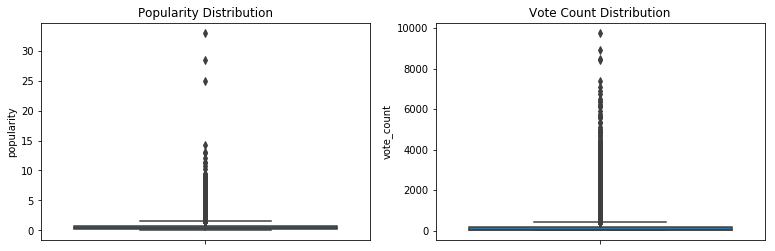

In [34]:
#visualizing the outlier data using box plot
fig,axes=plt.subplots(1,2)
fig.subplots_adjust(right=1.8)
ax1=sns.boxplot(y="popularity",data=cleaned_movie_datav3, ax=axes[0])
ax2=sns.boxplot(y="vote_count",data=cleaned_movie_datav3, ax=axes[1])
ax1.set_title('Popularity Distribution')
ax2.set_title('Vote Count Distribution')
plt.show()

From the box lot , we can actually see that there are outliers in the data. 

In [35]:
#check for outliers on the popularity and vote_count columns.
#Define function to detect the outliers and return the upper & lower bounds of each column
def outliers_detector(df, col):
    Q1= df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper_popularity_bound, lower_popularity_bound = outliers_detector(cleaned_movie_datav3, "popularity")
upper_vote_bound, lower_vote_bound = outliers_detector(cleaned_movie_datav3, "vote_count")


The defined function returns the upper and lower bounds of the outliers for each column.

In [36]:
#we get the boolean value of rows that are not outliers & create new columns in our dataframe.
cleaned_movie_datav3['poplarity_bool']=(cleaned_movie_datav3['popularity']>lower_popularity_bound) & (cleaned_movie_datav3['popularity']<upper_popularity_bound)
cleaned_movie_datav3['votecount_bool']=(cleaned_movie_datav3['vote_count']>lower_vote_bound) & (cleaned_movie_datav3['vote_count']<upper_vote_bound)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


We create new columns that contains boolean values, True if data is not an outlier,& False if data is an outlier.

In [37]:
##Get the rows where the two last boolean columns are True(data is not an outlier) and create a new dataframe-cleaned_movie_datav31
cleaned_movie_datav31=cleaned_movie_datav3.loc[cleaned_movie_datav3['poplarity_bool'] & cleaned_movie_datav3['votecount_bool']]


We select rows where the new boolean columns are equal to True.i.e Data is not an outlier.

In [38]:
#show the distributionof the  new dataframe columns  to see a summary of the values.
cleaned_movie_datav31[['popularity','vote_count']].describe()

,popularity,vote_count
count,8352,8352
mean,0,73
std,0,85
min,0,10
25%,0,17
50%,0,34
75%,1,90
max,2,407


In [39]:
#Below is the distribution before we removed outliers.
cleaned_movie_datav3[['popularity','vote_count']].describe()

,popularity,vote_count
count,9757,9757
mean,1,240
std,1,603
min,0,10
25%,0,18
50%,0,46
75%,1,174
max,33,9767


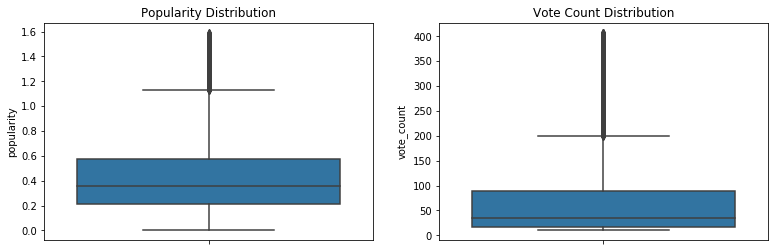

In [40]:
#plot the new columns on a boxlot to show that indeed the outliers have been removed.
fig,axes=plt.subplots(1,2)
fig.subplots_adjust(right=1.8)
ax1=sns.boxplot(y="popularity",data=cleaned_movie_datav31, ax=axes[0])
ax2=sns.boxplot(y="vote_count",data=cleaned_movie_datav31, ax=axes[1])
ax1.set_title('Popularity Distribution')
ax2.set_title('Vote Count Distribution')
plt.show()

In [41]:
#missing values  across different columns
#we have duplicate values
#inaccurate values in the runtime columns
#release date should be datetime
#id column data type should be object.
#budget and revenue columns set to 0
#release year should be set to datetime


#tidiness issue in the cast,director, production_companies, genre columns

In [42]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


We can  see that outliers have been removed both from the distribution and visualisation. 

<a id='eda'></a>
## Exploratory Data Analysis




### what is the number of movies produced each year from 1960.

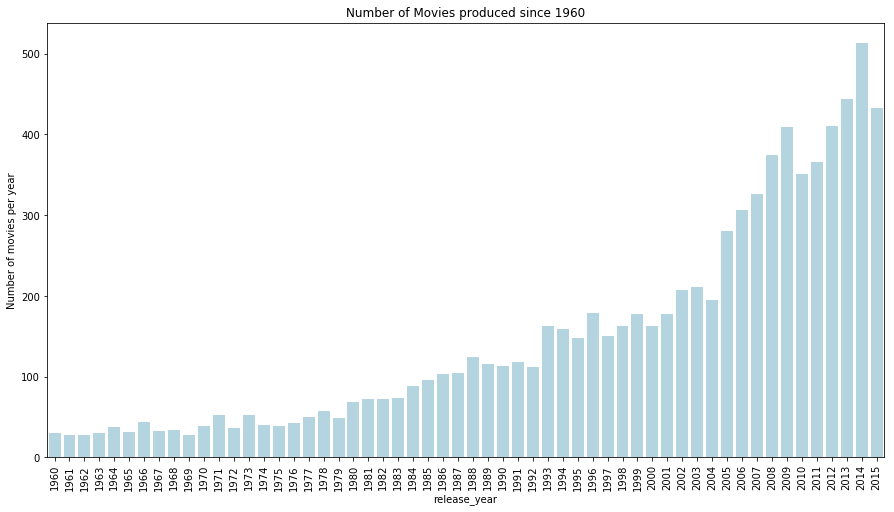

In [43]:
# use Groupby and count to get the number of movies produced each year.

movies_per_year=cleaned_movie_datav31.groupby('release_year')['original_title'].count().to_frame().rename({'original_title':'Number of movies per year'},axis=1).sort_values(by='Number of movies per year',ascending=False).reset_index()
plt.figure(figsize = (15,8))
ax=sns.barplot(data=movies_per_year,x='release_year',y='Number of movies per year',color='lightblue')
ax.set_title('Number of Movies produced since 1960')
ax.tick_params(axis='x', rotation=90)


We have seen a steady increase in movies produced since 1960.A surge in the numbers is noted since the year 2005

### Which genres combinations are most popular among Directors

In [44]:
#use groupby to determine which genre combinations have been played most by directors
popular_genre_combinations=cleaned_movie_datav31.groupby('genres')['cast'].count().to_frame().rename({'cast':'Number of times Played'},axis=1).sort_values(by='Number of times Played',ascending=False).reset_index()
popular_genre_combinations.head(20)

,genres,Number of times Played
0,Drama,575
1,Comedy,547
2,Drama|Romance,242
3,Comedy|Drama,235
4,Horror|Thriller,226
5,Comedy|Romance,216
6,Horror,215
7,Comedy|Drama|Romance,186
8,Documentary,184
9,Drama|Thriller,123


Drama and Comedy genres are played most by directors,followed closely by Drama/Romance & Comedy/Drama

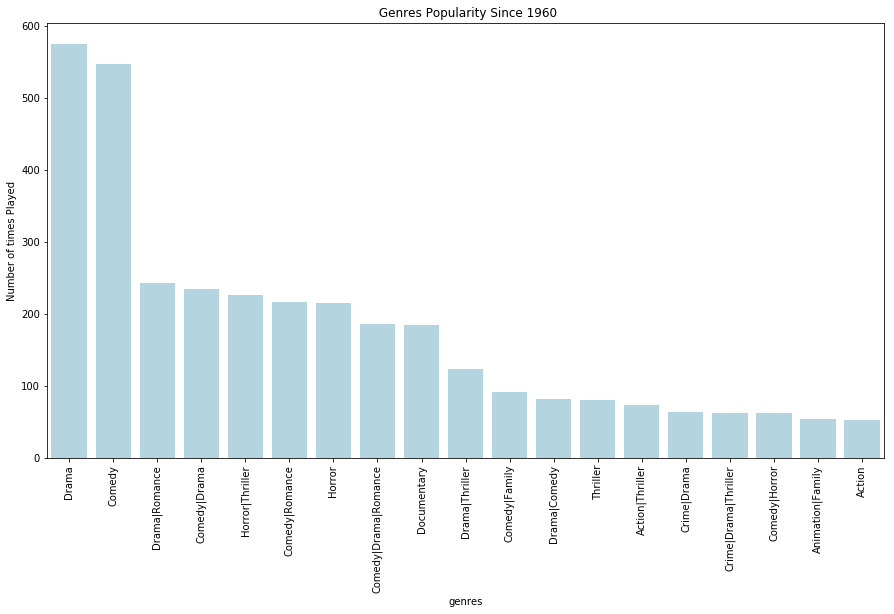

In [45]:
#plot the genre combinations where the combination was played in a movie more than 50times since 1960
popular_genre_combinationsv1=popular_genre_combinations[popular_genre_combinations['Number of times Played']>50]
plt.figure(figsize = (15,8))
ax=sns.barplot(data=popular_genre_combinationsv1,x='genres',y='Number of times Played',color='lightblue')
ax.set_title(' Genres Popularity Since 1960')
ax.tick_params(axis='x', rotation=90)


It is noted that drama and comedy genres have been played most by directors in movies.This is both when the genres area played independently and when combined with other genres. The two genres are very popular among directors

### How many times has each specific genre been played in a movie since 2010

In [46]:
#Get all movie genres produced after or in 2010.

genres_played_2010=cleaned_movie_datav31[['genres','release_year']].query('release_year>=2010')
genres_played_2010.head()

,genres,release_year
104,Comedy,2015
106,Comedy|Horror,2015
109,Crime|Action|Thriller,2015
110,Horror|Comedy|Fantasy,2015
111,Drama|Mystery|Thriller,2015


We have filtered out all genres groups that were released in and after the year 2010.

In [47]:
#set release_year as the index.
genres_played_2010.set_index('release_year',inplace=True)
genres_played_2010.head()

,genres
release_year,
2015,Comedy
2015,Comedy|Horror
2015,Crime|Action|Thriller
2015,Horror|Comedy|Fantasy
2015,Drama|Mystery|Thriller


We set the release_year as the index so that we can run further analysis on the column

In [48]:
#explode the genres column to get each genre in its own row.
genres_played_2010v1=genres_played_2010.assign(genres=genres_played_2010['genres'].str.split('|')).explode('genres')
genres_played_2010v1.head(10)

,genres
release_year,
2010,Horror
2010,Thriller
2010,Drama
2010,Romance
2010,Drama
2010,Adventure
2010,History
2010,Action
2010,Science Fiction


We explode and map each genre to its year of release

In [49]:
#group the dataframe by release_year and genre to get number of times each genre was played per year
genres_played_2010v2=genres_played_2010v1.groupby(['release_year','genres'])['genres'].count().to_frame()
genres_played_2010v2.head(20)

genres
release_year genres                 
2010         Action            24570
             Adventure         11232
             Animation         13689
             Comedy            44577
             Crime             13338
             Documentary        6669
             Drama             58266
             Family            11934
             Fantasy            9828
             Foreign            3159
             History            3861
             Horror            21411
             Music              1755
             Mystery            8073
             Romance           21060
             Science Fiction   11583
             TV Movie           2106
             Thriller          35100
             War                2106
             Western            1755

We group the dataframe by release_year and genre to get number of times each genre was played per year

In [50]:
#number of times each genre was played year by year from 2015
genres_played_2010v3=genres_played_2010v2.rename({'genres':'Number of times played'},axis=1).reset_index()
genres_played_2010v3
genres_played_2010v3.pivot(index='genres',columns='release_year',values='Number of times played')

release_year,2010,2011,2012,2013,2014,2015
genres,,,,,,
Action,24570,25254,26715,28860,41553,26846
Adventure,11232,12078,11508,15984,20520,12990
Animation,13689,10248,9042,12876,12312,11691
Comedy,44577,43554,50964,50616,67716,46331
Crime,13338,12078,15207,17316,22572,10825
Documentary,6669,9882,11508,17316,23598,16021
Drama,58266,57462,69459,78144,114399,79239
Family,11934,17568,11508,14208,15903,11691
Fantasy,9828,8418,6987,8436,11286,8227


We note a steady decline in the number of animation and Foreign genres played in movies since 2010

We further noted a steady increase in number of times the below genres have played since 2010
<ul>
    <li>Action</li>
     <li>Crime</li>
     <li>Documentary</li>
     <li>Horror</li>
     <li>Music</li>
     <li>Science Fiction</li>
</ul>

### What kinds of properties are associated with movies that have high revenues?

In [51]:
#sort original dataframe by revenue_adj to get the higest revenue movies.
#cleaned_movie_datav3.columns
cleaned_movie_datav31.sort_values(by='revenue_adj',ascending=False).head(3)

,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj,poplarity_bool,votecount_bool
8094,tt0113957,1,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,7/28/95,201,6,1995,1583049536,True,True
1340,tt0076666,1,Saturday Night Fever,John Travolta|Karen Lynn Gorney|Barry Miller|J...,John Badham,118,Drama|Music,Paramount Pictures|Robert Stigwood Organizatio...,12/16/77,192,6,1977,853081316,True,True
10595,tt0070328,2,Live and Let Die,Roger Moore|Yaphet Kotto|Jane Seymour|Clifton ...,Guy Hamilton,121,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),7/5/73,293,6,1973,794516769,True,True


In [52]:
#get the  75th percentile of the revenue_adj column
cleaned_movie_datav31['revenue_adj'].describe()

count         8352
mean      23171826
std       63300302
min              0
25%              0
50%              0
75%       16166416
max     1583049536
Name: revenue_adj, dtype: float64

We view the distribution of data in the revenue_adj column

In [53]:
#Filter data  equal to the 75th percentile revenue

revenue_condv1 = (cleaned_movie_datav31['revenue_adj'] > cleaned_movie_datav31['revenue_adj'].quantile(0.75))
high_revenue_moviesv1=cleaned_movie_datav31[revenue_condv1]
high_revenue_moviesv1.shape

(2088, 15)

We capture the 75th percentile of our original data

In [54]:
#inorder to get the next the next 75th Percentile of our data, we have to repeat the same process.
#get the next 75th percentile of the high_revenue_moviesv1
revenue_condv2 = (high_revenue_moviesv1['revenue_adj'] > high_revenue_moviesv1['revenue_adj'].quantile(0.75))
Final_high_revenue_moviesv1=high_revenue_moviesv1[revenue_condv2]
Final_high_revenue_moviesv1.loc[:,'decade']=Final_high_revenue_moviesv1['release_year'].apply(lambda x: int(np.floor(x / 10) * 10))
Final_high_revenue_moviesv1

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj,poplarity_bool,votecount_bool,decade
724,tt1823664,2,Annie,QuvenzhanÃ© Wallis|Jamie Foxx|Rose Byrne|Camer...,Will Gluck,119,Music|Comedy|Drama|Family,Columbia Pictures|Sony Pictures Entertainment ...,12/19/14,331,6,2014,123262077,True,True,2010
734,tt1085492,1,The Prince,Bruce Willis|Jason Patric|John Cusack|Jessica ...,Brian A Miller,93,Thriller|Action,Grindstone Entertainment Group|Emmett/Furla Fi...,8/22/14,165,5,2014,245550716,True,True,2010
743,tt2980706,1,Planes: Fire & Rescue,Dane Cook|Ed Harris|Julie Bowen|Curtis Armstro...,Roberts Gannaway,83,Animation|Comedy|Adventure|Family,Walt Disney Pictures|DisneyToon Studios|Prana ...,7/17/14,223,6,2014,139237454,True,True,2010
1335,tt0075784,1,A Bridge Too Far,Dirk Bogarde|James Caan|Michael Caine|Sean Con...,Richard Attenborough,175,Drama|History|War,Joseph E. Levine Productions,6/15/77,109,6,1977,182587387,True,True,1970
1340,tt0076666,1,Saturday Night Fever,John Travolta|Karen Lynn Gorney|Barry Miller|J...,John Badham,118,Drama|Music,Paramount Pictures|Robert Stigwood Organizatio...,12/16/77,192,6,1977,853081316,True,True,1970
1341,tt0076141,1,High Anxiety,Mel Brooks|Madeline Kahn|Cloris Leachman|Harve...,Mel Brooks,94,Comedy|Music,Twentieth Century Fox Film Corporation|Crossbo...,12/25/77,29,6,1977,111758009,True,True,1970
1342,tt0076729,1,Smokey and the Bandit,Burt Reynolds|Sally Field|Jerry Reed|Jackie Gl...,Hal Needham,96,Action|Adventure|Comedy,Universal Pictures,5/26/77,93,7,1977,455973515,True,True,1970
1351,tt0076009,0,Exorcist II: The Heretic,Linda Blair|Richard Burton|Louise Fletcher|Max...,John Boorman,118,Horror|Thriller|Fantasy,Warner Bros.,6/17/77,56,5,1977,110628680,True,True,1970
1352,tt0075648,0,Airport '77,Jack Lemmon|Lee Grant|Brenda Vaccaro|Joseph Co...,Jerry Jameson,114,Action|Adventure|Drama|Thriller,Universal Pictures,3/11/77,25,6,1977,107933431,True,True,1970
1366,tt0076489,0,"Oh, God!",John Denver|George Burns|Teri Garr|Donald Plea...,Carl Reiner,98,Fantasy|Comedy,Warner Bros.,10/7/77,15,6,1977,149981572,True,True,1970


We then capture the next 75th percentile of the first 75th percentile data to ensure we have the best high revenue movie data

Get the years when the high revenue movies were produced.

In [55]:
#get the years when the high revenue movies were produced.
Final_high_revenue_moviesv1_year=Final_high_revenue_moviesv1['decade'].value_counts().to_frame().reset_index()
Final_high_revenue_moviesv1_year
#Final_high_revenue_moviesv1['decade'].shape

,index,decade
0,1990,154
1,2000,147
2,1980,95
3,1970,72
4,2010,29
5,1960,25


We now have a count of number of movies produced each decade

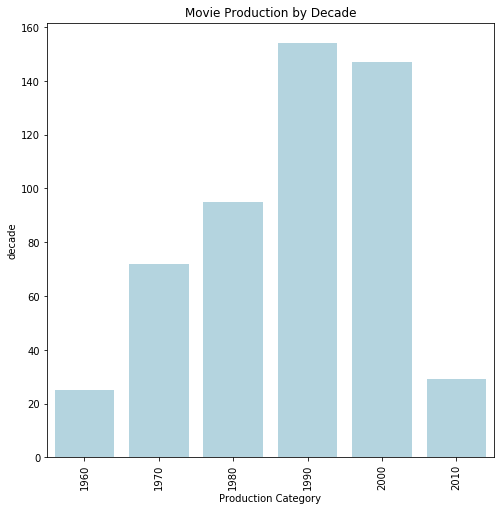

In [56]:
#most of the high revenue movies were produced in the 1990's.
plt.figure(figsize = (8,8))
ax=sns.barplot(data=Final_high_revenue_moviesv1_year,x='index',y='decade',color='lightblue')
ax.set_title('Movie Production by Decade')
ax.set_xlabel("Production Category")
ax.tick_params(axis='x', rotation=90)
plt.show()

We note that most of the high revenue movies were produced in the 1990's and 2000's

Which are the most popular production companies among the high revenues movies

In [57]:
#get all production companies on the high revenue category

Final_high_revenue_moviesv2_company=Final_high_revenue_moviesv1[['imdb_id','production_companies']].assign(production_companies=Final_high_revenue_moviesv1['production_companies'].str.split('|')).explode('production_companies')
Final_high_revenue_moviesv2_company.head()



,imdb_id,production_companies
724,tt1823664,Columbia Pictures
724,tt1823664,Sony Pictures Entertainment (SPE)
724,tt1823664,Overbrook Entertainment
734,tt1085492,Grindstone Entertainment Group
734,tt1085492,Emmett/Furla Films


In [58]:
#Group by production companies and get number of companies
Final_high_revenue_moviesv3_company=Final_high_revenue_moviesv2_company.groupby('production_companies').count().rename({'imdb_id':'Total Count'},axis=1).sort_values(by='Total Count',ascending=False).reset_index()
Final_high_revenue_moviesv3_company.head(10)

,production_companies,Total Count
0,Warner Bros.,71
1,Paramount Pictures,69
2,Universal Pictures,67
3,Twentieth Century Fox Film Corporation,47
4,Touchstone Pictures,32
5,Columbia Pictures Corporation,28
6,Columbia Pictures,27
7,Walt Disney Pictures,19
8,New Line Cinema,18
9,Metro-Goldwyn-Mayer (MGM),17


We have a count of number of times each production company produced a high revenue. We will go ahead and visualise this.

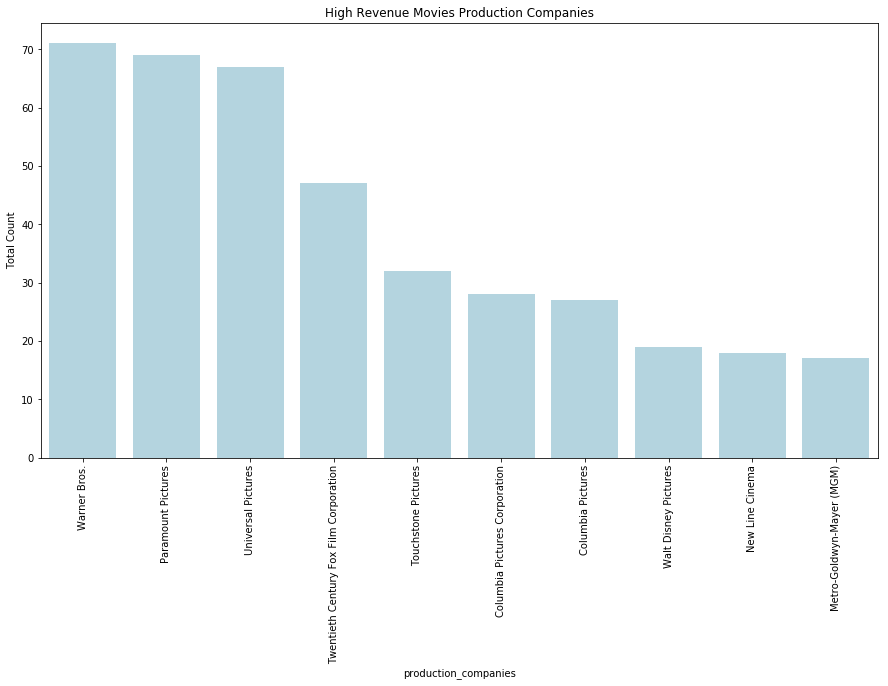

In [59]:
#visualize results to show the production company that produced highest number of movies in the high revenue category.
#we only visualize the top 10
plt.figure(figsize = (15,8))
ax=sns.barplot(data=Final_high_revenue_moviesv3_company.head(10),x='production_companies',y='Total Count',color='lightblue')
ax.set_title('High Revenue Movies Production Companies')
ax.tick_params(axis='x', rotation=90)
plt.show()

We note that Warner Bros and Paramount Pictures produced the highest number of high revenue movies

Which are the most popular genres among the high revenues movies

In [60]:
#get the number of times each genre has played in a movie among the high revenue category
Final_high_revenue_moviesv2_genres=Final_high_revenue_moviesv1[['imdb_id','genres']].assign(genres=Final_high_revenue_moviesv1['genres'].str.split('|')).explode('genres')
Final_high_revenue_moviesv3_genres=Final_high_revenue_moviesv2_genres.groupby('genres').count()
Final_high_revenue_moviesv4_genres=Final_high_revenue_moviesv3_genres.rename({'imdb_id':'Count'},axis=1).reset_index().sort_values(by='Count',ascending=False)
Final_high_revenue_moviesv4_genres.head()

,genres,Count
6,Drama,237
3,Comedy,234
0,Action,153
15,Thriller,146
1,Adventure,117


Drama & Comedy genres are among the best sellers, wherease Documentary & Western are among the worst performers .

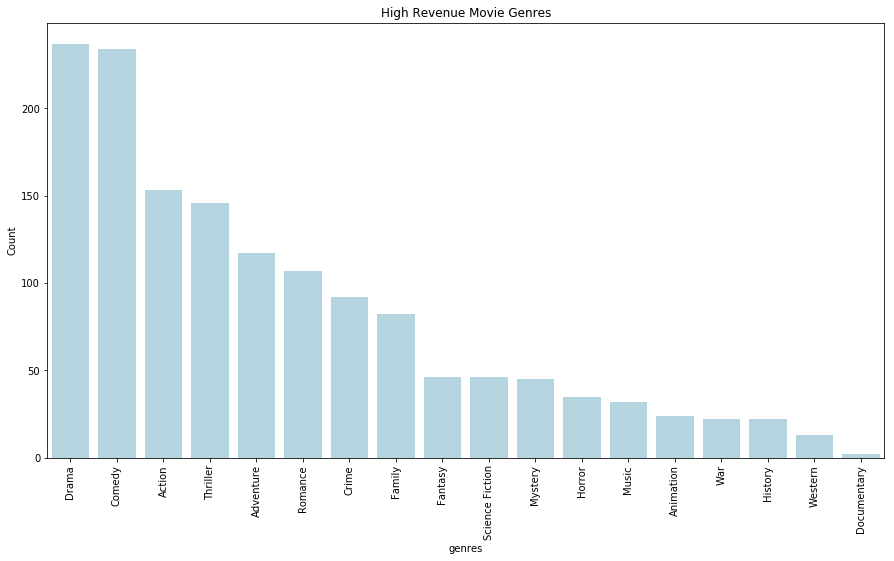

In [61]:

#Visualize results.
plt.figure(figsize = (15,8))
ax=sns.barplot(data=Final_high_revenue_moviesv4_genres,x='genres',y='Count',color='lightblue')
ax.set_title('High Revenue Movie Genres')
ax.tick_params(axis='x', rotation=90)
plt.show()

We note that Drama and Comedy have the highest number, followed closely by Action and Thriller genres

Which directors have produced the highest movies in the  high revenues movies category

In [62]:
#Group directors based on number of movies directed.
Final_high_revenue_moviesv2_director=Final_high_revenue_moviesv1[['imdb_id','director']].assign(director=Final_high_revenue_moviesv1['director'].str.split('|')).explode('director')
Final_high_revenue_moviesv3_director=Final_high_revenue_moviesv2_director.groupby('director').count()
Final_high_revenue_moviesv4_director=Final_high_revenue_moviesv3_director.rename({'imdb_id':'Count'},axis=1).sort_values(by='Count',ascending=False).reset_index()
Final_high_revenue_moviesv4_director.head()


,director,Count
0,Ron Howard,8
1,Clint Eastwood,7
2,Sydney Pollack,7
3,Oliver Stone,5
4,Ivan Reitman,5


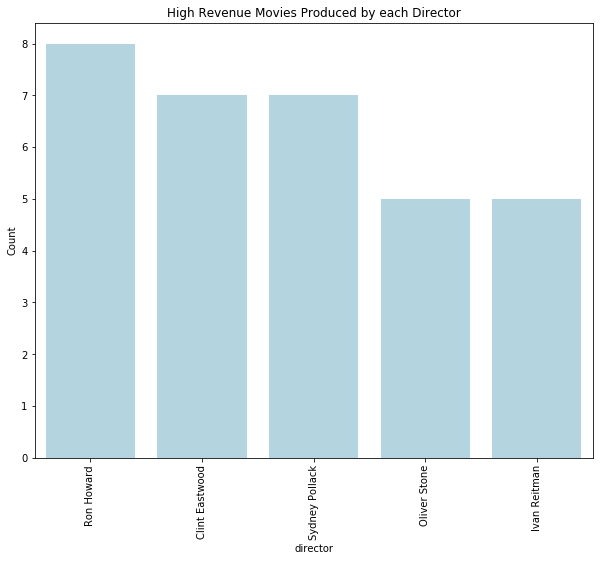

In [63]:

#Visualize results.
plt.figure(figsize = (10,8))
ax=sns.barplot(data=Final_high_revenue_moviesv4_director.head(),x='director',y='Count',color='lightblue')
ax.tick_params(axis='x', rotation=90)
ax.set_title('High Revenue Movies Produced by each Director')
plt.show()

Director Ron Howard has directed most of the highest revenue movies .He would be a good hire as a director for a movie with a high revenue target.

Vote distribution for the High revenue Movies

In [64]:
#check distribution of the average vote column
Final_high_revenue_moviesv1['vote_average'].describe()

count   522
mean      6
std       1
min       4
25%       6
50%       6
75%       7
max       8
Name: vote_average, dtype: float64

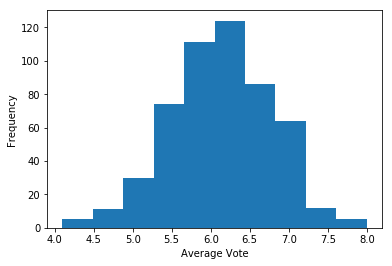

In [65]:
ax=Final_high_revenue_moviesv1['vote_average'].plot(kind='hist')
ax.set_xlabel('Average Vote')
plt.show()

It is noted that the distribution of the average vote column is normal, with many movies having a rating of between 6.0 & 6.5

Characteristics of high revenue movies:
<ul>
<li>Most of the high revenue movies were produced in the 1990's and 2000's</li>
<li>Most of the high revenue movies were produced by Warner Bros and Universal Pictures.</li>
<li>Director Ron Howard produced most of the high revenue movies.</li>
<li>The maximum average vote for high revenue movies is 8, and the minimum is 7</li>
</ul>

### How many times has each director directed movies with each of the different genres

In [66]:
# This is useful when selecting a director for particular movies with specific genres.
#load the original dataframe cleaned_movie_datav3 ,  that contains all records
#get each director name matched with a specific imdb id(movie) that they worked on 
cleaned_movie_datav3_director=cleaned_movie_datav31[['imdb_id','director']].assign(director=cleaned_movie_datav3['director'].str.split('|')).explode('director')
cleaned_movie_datav3_director[['imdb_id','director']].head()

,imdb_id,director
104,tt1674771,Doug Ellin
106,tt1727776,Christopher B. Landon
109,tt3276924,Scott Mann
110,tt3850590,Michael Dougherty
111,tt2402101,Gilles Paquet-Brenner


Here, we have a record of each unique imdb_id and the director who was involved in producing it

In [67]:
#match each genre with its specific imdb id(movie),where it was played.
cleaned_movie_datav3_genres=cleaned_movie_datav31[['imdb_id','genres']].assign(genres=cleaned_movie_datav3['genres'].str.split('|')).explode('genres')
cleaned_movie_datav3_genres[['imdb_id','genres']].head()

,imdb_id,genres
104,tt1674771,Comedy
106,tt1727776,Comedy
106,tt1727776,Horror
109,tt3276924,Crime
109,tt3276924,Action


We also have a record of each genre and the imdb_id movie it was played in. We will then merge these two dataframes on imdb_id to
get a dataframe that contains both the director and genre for each imdb_id(movie)

In [68]:
#merge cleaned_movie_datav3_genres and cleaned_movie_datav3_director on imdb id.
director_genre_dfv1=cleaned_movie_datav3_genres.merge(cleaned_movie_datav3_director, on='imdb_id')
director_genre_dfv1.head(10)

,imdb_id,genres,director
0,tt1674771,Comedy,Doug Ellin
1,tt1727776,Comedy,Christopher B. Landon
2,tt1727776,Horror,Christopher B. Landon
3,tt3276924,Crime,Scott Mann
4,tt3276924,Action,Scott Mann
5,tt3276924,Thriller,Scott Mann
6,tt3850590,Horror,Michael Dougherty
7,tt3850590,Comedy,Michael Dougherty
8,tt3850590,Fantasy,Michael Dougherty
9,tt2402101,Drama,Gilles Paquet-Brenner


The merged dataframe contains the imdb_id,genres and director columns.We will group by Director name and count number of times each genre has been played by a director

In [69]:
director_genre_dfv2=director_genre_dfv1.groupby(['director','genres']).count()
director_genre_dfv2.rename({'imdb_id':'Count'},axis=1).sort_values(by='Count',ascending=False).head(10)


,,Count
director,genres,
Woody Allen,Comedy,35
Clint Eastwood,Drama,21
Woody Allen,Drama,17
Sidney Lumet,Drama,16
Stephen Frears,Drama,16
Woody Allen,Romance,16
Steven Soderbergh,Drama,15
John Landis,Comedy,14
Mike Nichols,Drama,14


We are able to determine the number of times each director has directed a specific movie genre.The higher the number of times, the more experience a director has producing movies with such a genre.

### How many times has each cast played a movie with any of the different genres

In [70]:
# This is useful when selectign a cast for particular movies with specific genres.
#load the original dataframe cleaned_movie_datav3 ,  that contains all records
#get each cast name matched with a specific imdb id(movie) that they worked on 
cleaned_movie_datav3_cast=cleaned_movie_datav31[['imdb_id','cast']].assign(cast=cleaned_movie_datav3['cast'].str.split('|')).explode('cast')
cleaned_movie_datav3_cast[['imdb_id','cast']].head()

,imdb_id,cast
104,tt1674771,Jeremy Piven
104,tt1674771,Adrian Grenier
104,tt1674771,Jerry Ferrara
104,tt1674771,Kevin Connolly
104,tt1674771,Kevin Dillon


We have matched each cast with the specific movie that they played in

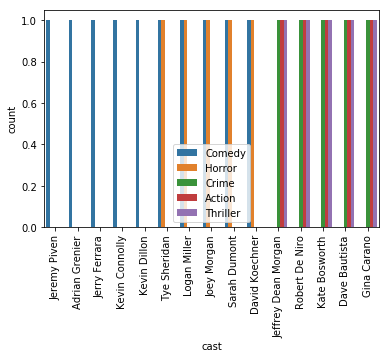

In [96]:
#merge cleaned_movie_datav3_genres and cleaned_movie_datav3_cast on imdb id.
cast_genre_dfv1=cleaned_movie_datav3_genres.merge(cleaned_movie_datav3_cast, on='imdb_id')
sns.countplot(data=cast_genre_dfv1.head(30),x='cast',hue='genres')
plt.xticks(rotation=90)
plt.show()

We have then matched on imdb_id, each cast with the respective genre of each movie they played in 

In [72]:
cast_genre_dfv2=cast_genre_dfv1.groupby(['cast','genres']).count()
cast_genre_dfv2.rename({'imdb_id':'Count'},axis=1).sort_values(by='Count',ascending=False).head(10)


,,Count
cast,genres,
Jean-Claude Van Damme,Action,37
Eddie Murphy,Comedy,33
Richard Gere,Drama,31
Samuel L. Jackson,Drama,31
Woody Allen,Comedy,31
Robert De Niro,Drama,31
Meryl Streep,Drama,31
Steve Martin,Comedy,30
Steven Seagal,Action,29


We are able to match the number of times each cast has played a specific movie genre. A higher count means that this cast has experience with this genre and would a good fit to play the same genre in a future movie.

### Are there instances where directors  cast their own Movies

In [73]:
#merge the cast and director dataframes on imdb_id.
cleaned_movie_datav3_cast.head()
cleaned_movie_datav3_director.head()
director_cast_v1=cleaned_movie_datav3_cast.merge(cleaned_movie_datav3_director,on='imdb_id')
director_cast_v1.head()

,imdb_id,cast,director
0,tt1674771,Jeremy Piven,Doug Ellin
1,tt1674771,Adrian Grenier,Doug Ellin
2,tt1674771,Jerry Ferrara,Doug Ellin
3,tt1674771,Kevin Connolly,Doug Ellin
4,tt1674771,Kevin Dillon,Doug Ellin


We have populated a list of cast and director using imdb_id and we filter instances where cast and director names are the same

In [74]:
#Check where the director and cast names are requal
director_cast_v1=director_cast_v1[director_cast_v1['cast']==director_cast_v1['director']]
director_cast_v1.iloc[:,1:].shape
#print(np.array(director_cast_v1))

(457, 2)

We can see that we have around 457 instances where directors cast their own movies.

### Is there a relationship between the average vote of a movie and its runtime

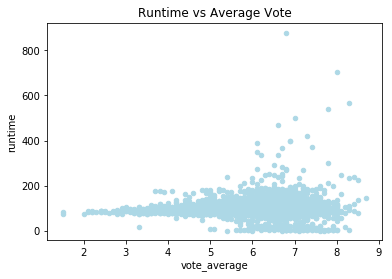

In [75]:
#To do this, we plot a scatterplot of runtime vs average vote of a movie.
cleaned_movie_datav31.plot(kind='scatter',x='vote_average',y='runtime',color='lightblue')
plt.title('Runtime vs Average Vote')
plt.show()

From the plot we can see that there is no relationship between the runtime and average vote of a movie.

### Is there a relationship between the popularity of a movie and its  vote count

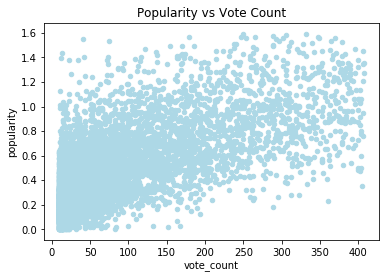

In [76]:
#To achieve this, we plot a scatter plot between the popularity of the movie and its vote count.
cleaned_movie_datav31.plot(kind='scatter',x='vote_count',y='popularity',color='lightblue')
plt.title('Popularity vs Vote Count')
plt.show()

In [83]:
sns.countplot(data=cleaned_movie_datav31,x='vote_count',y='popularity',hue='release_year')
#cleaned_movie_datav31.head()

TypeError: Cannot pass values for both `x` and `y`

we can see a relationship between the two variables.As the popularity increases, the vote count also  increases

### Is there a relationship between the popularity of a movie and its  runtime

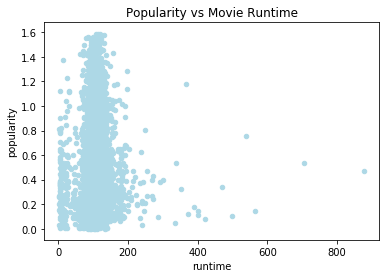

In [77]:
#To check for the relationship , we plot a scatter plot between the popularity of a movie and its runtime.
cleaned_movie_datav31.plot(kind='scatter',x='runtime',y='popularity',color='lightblue')
plt.title('Popularity vs Movie Runtime')
plt.show()

Movies with a runtime greater than 200minutes are less popular,while those with a runtime of less than 200 are more popular

<a id='conclusions'></a>
## Conclusions
<ul>Findings</ul>
<ul>
<li>There has been a steady increase in the number of movies produced each year from 1960 to 2015.There was a sharp spike in 2005 and 2014.We could not determine the cause of this from the available data</li>
<li>Drama and Comedy genres  are the most popular genres.This is because these two genres generate quite high revenues.Foreign genre has not been played since 2012.Further checks need to be done on why this is the case.</li>
<li>There was an exceptional increase in movies with the genre war in 2014 to 7695 times. This might be due to the Russia-Ukraine war which started in 2014-Donbass region. Further research however is needed on this.</li>
<li>There has been a steady increase in the number of times the genres Action,Crime,Documentary,Horror,Music,Science Fiction
 have been played since 2010.We have also observed a  steady decline in the number of times animation and Foreign genres have been played since 2010.</li>
<li>We have also observed  instances, where directors  cast their own movies.Reason for this is unknown, and further checks need to be done on this.</li>
<li>There is a direct relationship between the popularity of a movie and its runtime. Movies with a runtime of less than 200minutes are more popular, while those with more than 200minutes are less popular.</li>


</ul>

<ul>Limitations</ul>
<ul>
<li>Fiftly percent of budget and revenue columns was not available and therefore made it difficult to compute revenue related statistics.Dropping the data with missing vulues would have meant losing 50% of our data, which contained important information for other analysis.</li>
 <li>The budget and revenue data was not enough to calculate the profit from a particular movie. We would need the exact cost for producing each movie inorder to calculate profits</li>
 <li>We would need more data to determine the impact of directors being casts in their own movies i.e impact on cost and revenue of the movie
 <li>Data which was found to be outside the outlier bounds as per selected columns was not included in the analysis, and therefore may have some minimal impact on our results</li>
 </ul>




In [78]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0